In [5]:
import numpy as np
import pandas as pd
import matplotlib
import cv2 as cv
import tensorflow as tf
from tensorflow import keras, cast
import matplotlib.pyplot as plt
import math

In [6]:
cnn = tf.keras.models.load_model('bedroom.h5')

In [7]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      8224      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        165952    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 80)       

1/1 [==============================] - 0s 13ms/step


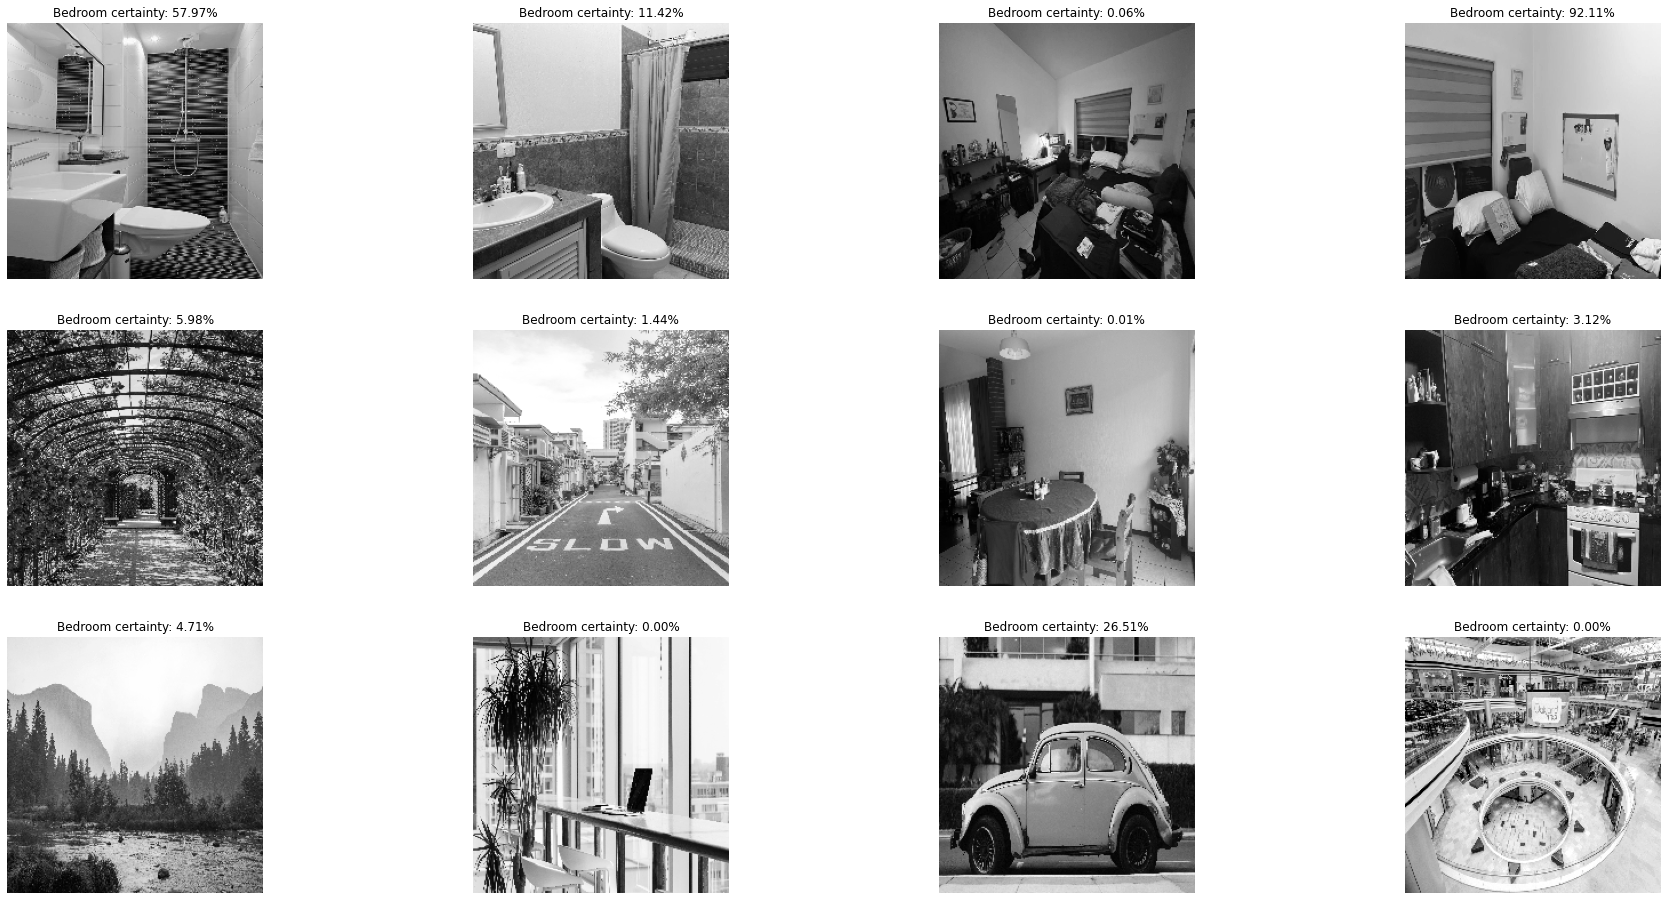

In [8]:
images_array = [
    '../test_real_images/bathroom_google.jpg',
    '../test_real_images/bathroom.png',
    '../test_real_images/bedroom_real.jpeg',
    '../test_real_images/bedroom_real_1.jpeg',
    '../test_real_images/garden.jpg',
    '../test_real_images/street.jpg',
    '../test_real_images/dining.png',
    '../test_real_images/kitchen_1.png',
    '../test_real_images/landscape.jpg',
    '../test_real_images/office.jpg',
    '../test_real_images/car.jpg',
    '../test_real_images/mall.png',
]

IMAGE_CHANNEL = 1

def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, IMAGE_CHANNEL)

images_array= [prepare(img) for img in images_array]
plt.figure(figsize=(32, 16))
for i in range(len(images_array)):
  predicted = cnn.predict(images_array[i])
  ax = plt.subplot(3, 4, i+1)
  plt.imshow(images_array[i].reshape((224,224)).astype('uint8'), cmap='gray')
  plt.title(f"Bedroom certainty: {predicted[0][0]*100:.2f}%")
  plt.axis('off')

plt.show()